<h1 style="color:white;background-image:url(data/NET-ZERO-SPACE-INITIATIVE-1.png); padding:20px 30px; border-radius:10px;background-size:cover;background-position:center;font-size:50px; text-align:center">SPACESHIP TITANIC</h1>

## OVERVIEW
The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">1. PROBLEM DEFINITION/GOAL</h4>

 * Predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
<br>
 * Given that we are attempting to predict wether or not a passenger have been transported by the anomaly , the problem we are exploring is a classification problem

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">2. DATA SOURCE </h4>

the dataset was obtained from KAGGLE Spaceship titanic competition it containes:
* **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
 * `PassengerId`- A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
 
 * `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
 
 * `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
 * `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
 * `Destination` - The planet the passenger will be debarking to.
 * `Age` - The age of the passenger.
 * `VIP` - Whether the passenger has paid for special VIP service during the voyage.
 * `RoomService`,`FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
 * `Name` - The first and last names of the passenger.
 * `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* **test.csv**  - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of `Transported` for the passengers in this set.
* **sample_submission.csv** - A submission file in the correct format.
 * `PassengerId` - Id for each passenger in the test set.
 * `Transported` - The target. For each passenger, predict either True or False.

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">2. EVALUTAION </h4>

the evaluation benchmark for this project is the `CLASSIFICATION ACCURACY` , the percentage of predicted labels that are correct our goal is to get the accuracy as high as possible 

## PROCESSING DATA 

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">1. GETTING THE TOOLS </h4>

In [105]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
sns.set_style("whitegrid")
colors=["#6A9BCF" , "#39ff14"]
sns.set_palette(sns.color_palette(colors))
sns.set_context("talk")

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">2. KNOWING OUR DATA SET </h4>

In [106]:
df = pd.read_csv("data/train.csv",low_memory=False)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [107]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [108]:
df.shape

(8693, 14)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [110]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [111]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [112]:
df.isna().sum().mean()

166.0

**SUMMARY OF INITIAL FINDINGS** <br>
 * there are `8693` entries and `14` features 
 * there are about `~166` missing values in `12 features`wich we will have to fix 
 * most of our columns are in string data type we have to convert them into numerical values 

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">3. PREPROCESSING THE DATA SET </h4>

**Preprocessing steps**
* split the `Name` column to `First_name` and `Last_name` 
* Convert `FALSE AND TRUE` values to `0 and 1`
* Split `PassengerId` to `groupId` and `membreId`
* Split `Cabin` to `deck` , `num` , `side`
* Convert the strings in our data to numbers
* fil up the missing values

**Copying our DataFrame to not lose it**

In [126]:
df_c = df.copy()
df_c.head().T

,0,1,2,3,4
PassengerId,0001_01,0002_01,0003_01,0003_02,0004_01
HomePlanet,Europa,Earth,Europa,Europa,Earth
CryoSleep,False,False,False,False,False
Cabin,B/0/P,F/0/S,A/0/S,A/0/S,F/1/S
Destination,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e
Age,39.0,24.0,58.0,33.0,16.0
VIP,False,False,True,False,False
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0


In [127]:
df_c.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**CONVERTING BOOLEAN TO INTEGER** <br>

converting `false` to  `0` and `True` to `1` 

In [128]:
df_c["Transported"] = df_c["Transported"].astype(int)

In [129]:
df_c.Transported

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [130]:
df_c["CryoSleep"].fillna(False , inplace=True)

In [131]:
df_c["CryoSleep"] = df_c["CryoSleep"].astype(int)

In [132]:
df_c["VIP"].fillna(False , inplace=True)

In [133]:
df_c["VIP"] = df_c["VIP"].astype(int)

In [134]:
df_c.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [135]:
df_c["Transported"].value_counts() , df_c["CryoSleep"].value_counts() , df_c["VIP"].value_counts()

(1    4378
 0    4315
 Name: Transported, dtype: int64,
 0    5656
 1    3037
 Name: CryoSleep, dtype: int64,
 0    8494
 1     199
 Name: VIP, dtype: int64)

**Feature Engineering**<br>

* we are going to split the `Cabin` feature to three different features  `deck` , `num` , `side`
* `PassengerId` to `groupId` , `membreId` 
* `Name` to `Fisrt_name` , `Last_name` 

In [136]:
new = df_c["Cabin"].str.split("/", expand=True )
df_c.insert(4,"deck",new[0])
df_c.insert(5,"num",new[1])
df_c.insert(6,"side",new[2])
new = df_c["PassengerId"].str.split("_", expand=True )
df_c.insert(2,"groupId",new[0])
df_c.insert(3,"membreId",new[1])
new = df_c["Name"].str.split(" ", expand=True )
df_c.insert(2,"First_name",new[0])
df_c.insert(3,"Last_name",new[1])

In [137]:
df_c.head().T

,0,1,2,3,4
PassengerId,0001_01,0002_01,0003_01,0003_02,0004_01
HomePlanet,Europa,Earth,Europa,Europa,Earth
First_name,Maham,Juanna,Altark,Solam,Willy
Last_name,Ofracculy,Vines,Susent,Susent,Santantines
groupId,0001,0002,0003,0003,0004
membreId,01,01,01,02,01
CryoSleep,0,0,0,0,0
Cabin,B/0/P,F/0/S,A/0/S,A/0/S,F/1/S
deck,B,F,A,A,F
num,0,0,0,0,1


In [138]:
df_c.drop("PassengerId" ,axis=1, inplace=True)
df_c.drop("Name",axis=1, inplace=True)
df_c.drop("Cabin",axis=1, inplace=True)
df_c

,HomePlanet,First_name,Last_name,groupId,membreId,CryoSleep,deck,num,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,Maham,Ofracculy,0001,01,0,B,0,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,Juanna,Vines,0002,01,0,F,0,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,Altark,Susent,0003,01,0,A,0,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,Solam,Susent,0003,02,0,A,0,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,Willy,Santantines,0004,01,0,F,1,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,Gravior,Noxnuther,9276,01,0,A,98,P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,Kurta,Mondalley,9278,01,1,G,1499,S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,Fayey,Connon,9279,01,0,G,1500,S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,Celeon,Hontichre,9280,01,0,E,608,S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">4. EXPLORATORY DATA ANALYSIS</h4>

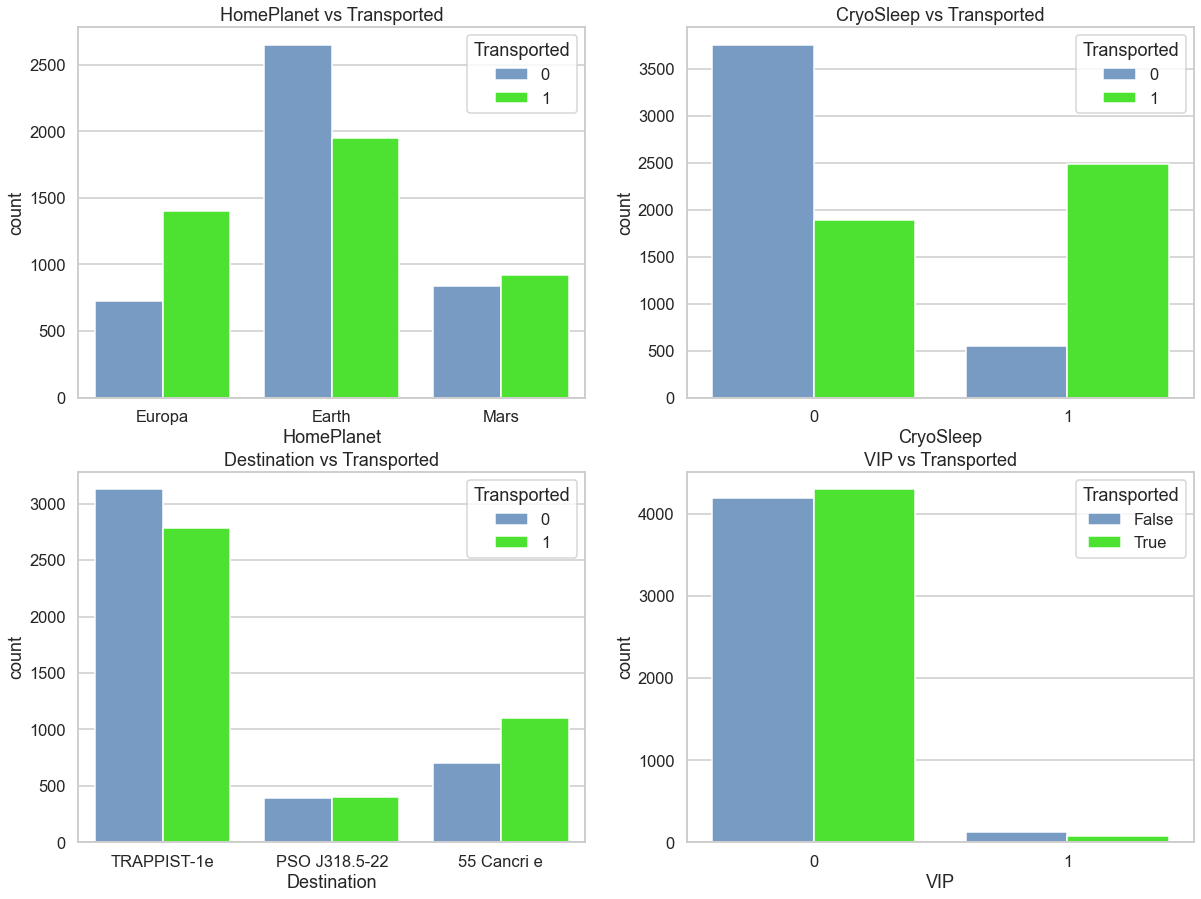

In [139]:
fig , axes = plt.subplots(2,2 , figsize=[20,15])
col_name= ["HomePlanet" , "CryoSleep", "Destination" , "VIP"]
for i , col in enumerate(col_name) :
    ax = axes.flat[i]
    sns.countplot(x=col , data=df_c , hue="Transported" , ax= ax )
    plt.legend(title="Transported",labels=["False", "True"])
    ax.set_title(col+" vs Transported")
plt.show();

**Conclusions** 
1. most of the passengers are from Earth , although most transported passengers are from mars and europa 
2. the most transported passengers were elected to be put into suspended animation
3. most of the passengers their destination was TRAPPIST-1e 
4. most of passengers did not pay for VIP services 

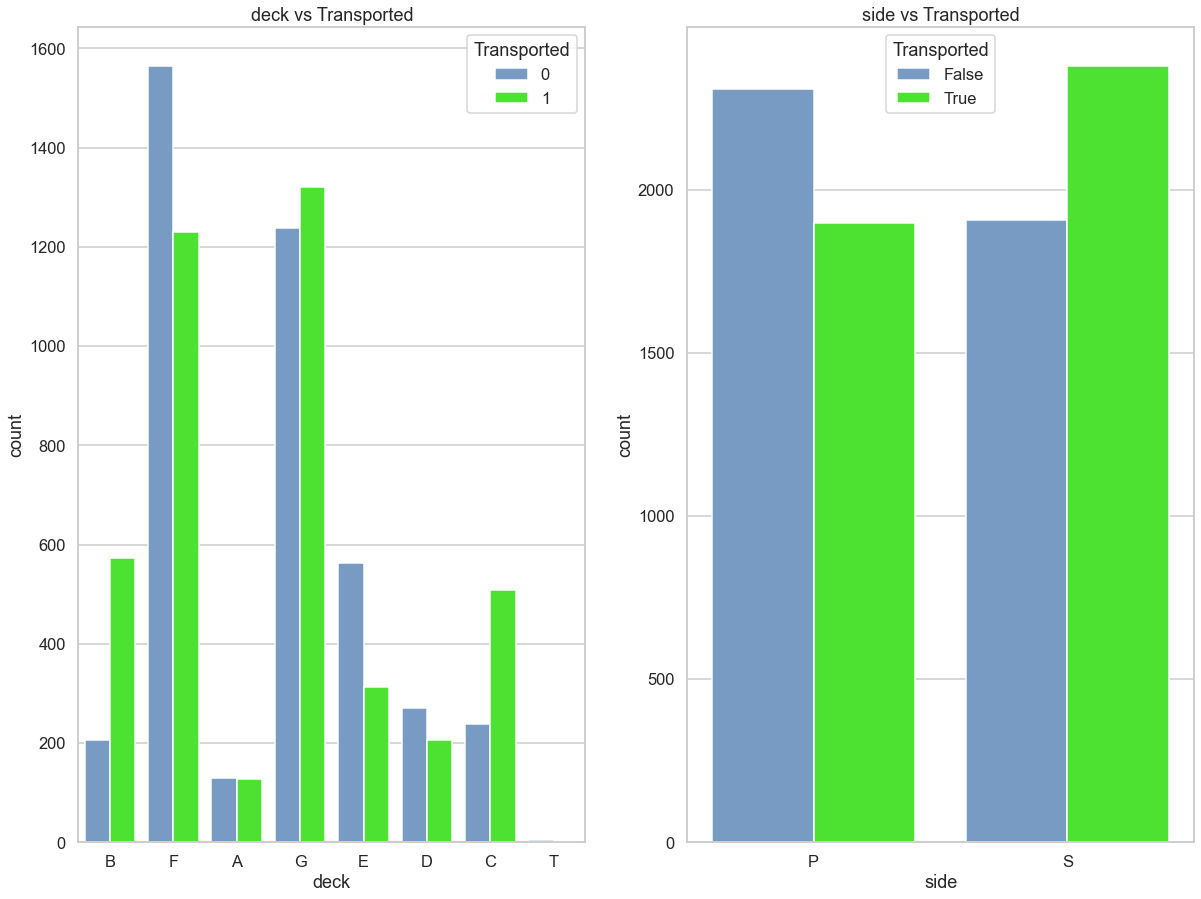

In [140]:
fig , axes = plt.subplots(1,2 , figsize=(20,15))
col_name= ["deck" , "side"]
for i , col in enumerate(col_name) :
    ax = axes.flat[i]
    sns.countplot(x=col , data=df_c , hue="Transported" , ax= ax )
    plt.legend(title="Transported",labels=["False", "True"])
    ax.set_title(col+" vs Transported")
plt.show();

**Conclusions**
1. most passengers were in cabin deck F and G 
2. your most likely to get Transported if your in cabin deck B or C 
3. your most likely to get Transported if yout in cabin side S

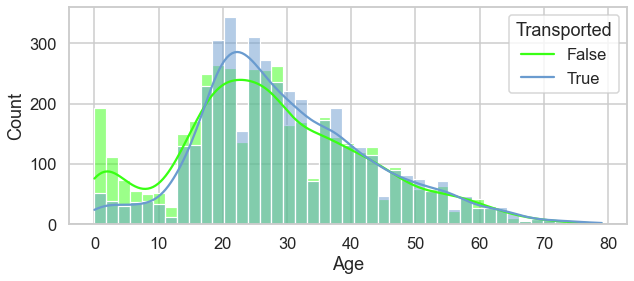

In [141]:
plt.figure(figsize=(10,4))
sns.histplot(x="Age" , data=df_c , hue='Transported', kde=True)
plt.legend(title="Transported" , labels=["False" ,"True"])
plt.show()

**Conclusions**
1. most of the passengers are between 16 and 32 y.o
2. your most likely to get Transported if yout under 13 y.o especially new borns

In [142]:
##columns with type object
for label, content in df_c.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

HomePlanet
First_name
Last_name
groupId
membreId
deck
num
side
Destination


In [143]:
for label, content in df_c.items():
    if pd.api.types.is_string_dtype(content):
        df_c[label] = content.astype("category").cat.as_ordered()

In [144]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   First_name    8493 non-null   category
 2   Last_name     8493 non-null   category
 3   groupId       8693 non-null   category
 4   membreId      8693 non-null   category
 5   CryoSleep     8693 non-null   int32   
 6   deck          8494 non-null   category
 7   num           8494 non-null   category
 8   side          8494 non-null   category
 9   Destination   8511 non-null   category
 10  Age           8514 non-null   float64 
 11  VIP           8693 non-null   int32   
 12  RoomService   8512 non-null   float64 
 13  FoodCourt     8510 non-null   float64 
 14  ShoppingMall  8485 non-null   float64 
 15  Spa           8510 non-null   float64 
 16  VRDeck        8505 non-null   float64 
 17  Transported   8693 non-null   int32   
dtypes: categ

In [145]:
df_c.groupId.cat.categories

Index(['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009',
       '0010',
       ...
       '9267', '9268', '9270', '9272', '9274', '9275', '9276', '9278', '9279',
       '9280'],
      dtype='object', length=6217)

**FILL IN MISSING VALUES**

In [146]:
##filling numeric data
for label, content in df_c.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_c[label] = content.fillna(content.median())
    

In [147]:
df_c.isna().sum()

HomePlanet      201
First_name      200
Last_name       200
groupId           0
membreId          0
CryoSleep         0
deck            199
num             199
side            199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [148]:
##turning categorical data into numerical 
for label, content in df_c.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories to numbers +1
        df_c[label] = pd.Categorical(content).codes+1

In [149]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int8   
 1   First_name    8693 non-null   int16  
 2   Last_name     8693 non-null   int16  
 3   groupId       8693 non-null   int16  
 4   membreId      8693 non-null   int8   
 5   CryoSleep     8693 non-null   int32  
 6   deck          8693 non-null   int8   
 7   num           8693 non-null   int16  
 8   side          8693 non-null   int8   
 9   Destination   8693 non-null   int8   
 10  Age           8693 non-null   float64
 11  VIP           8693 non-null   int32  
 12  RoomService   8693 non-null   float64
 13  FoodCourt     8693 non-null   float64
 14  ShoppingMall  8693 non-null   float64
 15  Spa           8693 non-null   float64
 16  VRDeck        8693 non-null   float64
 17  Transported   8693 non-null   int32  
dtypes: float64(6), int16(4), int

In [150]:
df_c.head()

,HomePlanet,First_name,Last_name,groupId,membreId,CryoSleep,deck,num,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,1615,1432,1,1,0,2,1,1,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,1408,2110,2,1,0,6,1,2,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,157,1991,3,1,0,1,1,2,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,2277,1991,3,2,0,1,1,2,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,2643,1779,4,1,0,6,2,2,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1


## MODELING

For this problem we will use the independent variables to try and predict the dependent variable `Transported`

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">3.1 CHOOSING OUR MODEL AND SPLITTING OUR DATA </h4>

In [151]:
df_num = df_c.copy()

In [152]:
y = df_num["Transported"]
x = df_num.drop("Transported", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.shape , x_test.shape, y_train.shape , y_test.shape 

((6954, 17), (1739, 17), (6954,), (1739,))

In [153]:
model = RandomForestClassifier()

In [154]:
model.fit(x_train , y_train)

RandomForestClassifier()

In [155]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1, 1, 0, ..., 0, 1, 0])

In [156]:
accuracy_score(y_test, y_pred_test)

0.8079355951696378

In [157]:
confusion_matrix(y_test, y_pred_test)

array([[710, 157],
       [177, 695]], dtype=int64)

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">3.2. HYPERPARAMETER TUNING</h4>

In [158]:
# Setup random seed
np.random.seed(42)

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [159]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [160]:
rs_rf.score(x_test, y_test)

0.8056354226566993

In [161]:
best_model = RandomForestClassifier( n_estimators = 460 ,
                                      min_samples_split = 6 ,
                                      min_samples_leaf = 9 ,
                                      max_depth = None)
best_model.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=6,
                       n_estimators=460)

In [162]:
best_model.score(x_test,y_test)

0.8062104657849338

<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">3.3. MAKING PREDICTIONS ON THE TEST DATA </h4>

In [172]:
## make a function to preprocess the data 
def pre(df):
    df["CryoSleep"].fillna(False , inplace=True)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    df["VIP"].fillna(False , inplace=True)
    df["VIP"] = df["VIP"].astype(int)
    n = df["Cabin"].str.split("/", expand=True )
    df.insert(4,"deck",n[0])
    df.insert(5,"num",n[1])
    df.insert(6,"side",n[2])
    n = df["PassengerId"].str.split("_", expand=True )
    df.insert(2,"groupId",new[0])
    df.insert(3,"membreId",new[1])
    n = df["Name"].str.split(" ", expand=True )
    df.insert(2,"First_name",new[0])
    df.insert(3,"Last_name",new[1])
    df.drop("PassengerId" ,axis=1, inplace=True)
    df.drop("Name",axis=1, inplace=True)
    df.drop("Cabin",axis=1, inplace=True)
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Turn categories to numbers +1
            df[label] = pd.Categorical(content).codes+1
            

    

In [173]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [174]:
df_origin = df_test.copy()
pre(df_test)
df_test

,HomePlanet,First_name,Last_name,groupId,membreId,CryoSleep,deck,num,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1293,1103,1293,1103,1,7,821,2,3,27.0,0,0.0,0.0,0.0,0.0,0.0
1,1,1119,1601,1119,1601,0,6,928,2,3,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,2,115,1512,115,1512,1,3,1,2,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,2,1798,1512,1798,1512,0,3,2,2,3,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,1,2092,1368,2092,1368,0,6,1030,2,3,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1213,1690,1213,1690,1,7,453,2,3,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,1,650,1449,650,1449,0,0,0,0,3,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,3,475,67,475,67,1,4,817,1,1,26.0,0,0.0,0.0,0.0,0.0,0.0
4275,2,231,1634,231,1634,0,4,818,1,0,26.0,0,0.0,2680.0,0.0,0.0,523.0


In [175]:
df_test.isna().sum()

HomePlanet      0
First_name      0
Last_name       0
groupId         0
membreId        0
CryoSleep       0
deck            0
num             0
side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [176]:
test_preds = best_model.predict(df_test)
test_preds

array([1, 0, 1, ..., 1, 1, 1])

In [177]:
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_origin["PassengerId"]
df_preds["Transported"] = test_preds
df_preds

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


<h4 style="background-color:#08273F;color:white;border-radius: 8px; padding:12px">3.4. FEATURE IMPORTANCE</h4>

In [178]:
best_model.feature_importances_

array([0.04584011, 0.03451919, 0.03148267, 0.04815722, 0.00678512,
       0.16207678, 0.0479558 , 0.04844193, 0.01862407, 0.01238026,
       0.04428015, 0.00024085, 0.11045962, 0.08690254, 0.07161656,
       0.11605989, 0.11417723])

In [179]:
def plot_features(columns, importances, n=30):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(8,10))
    ax.barh(df["features"][:n], df["feature_importances"][:30], 
            color='#44443d')
    ax.set_ylabel(None)
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

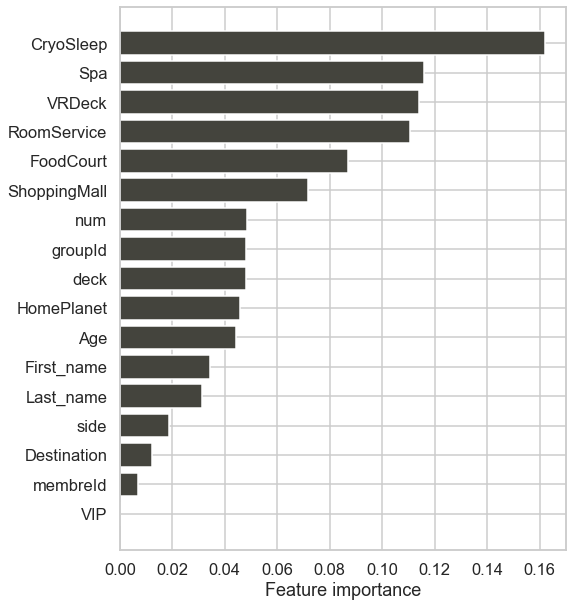

In [180]:
plot_features(x_train.columns, best_model.feature_importances_)

In [181]:
df_preds["Transported"] = df_preds["Transported"].astype("bool")

In [183]:
df_preds.to_csv("data/preds.csv",index=False)